<a href="https://colab.research.google.com/github/Gnome101/MAT_421/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Error and Instability
There are two main issues to consider with regard to integration schemes for ODEs: **accuracy** & **stability**.
Accuracy - scheme's ability to get close to the actual solution as a function of step size *h*
Stability - scheme's ability to keep the error from growing as it integrates foward in time



In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

<ipython-input-1-c8f64572e20b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


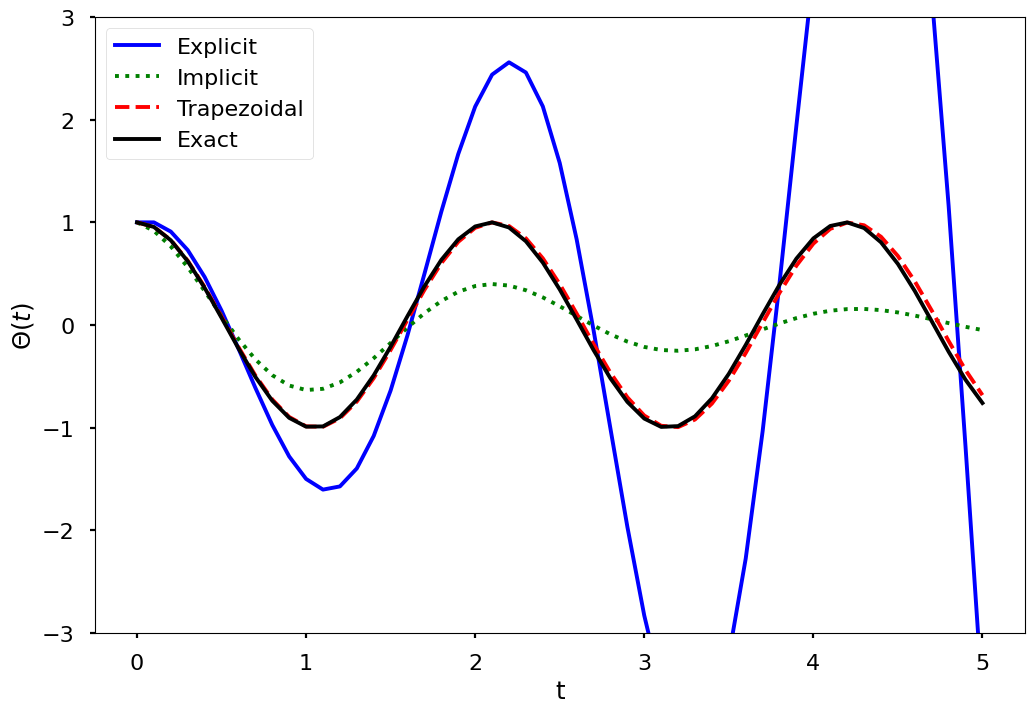

In [8]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 3
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])

m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()
#The following graph compares the three different methods


# Predictor-Corrector Methods

Given any time and state value, this returns the change of state. Predictor-corrrector methods query F mutiple time sat differnt locations.

Runge Kutta methods are some of the most widely used ones for solving ODE. They make use of a truncated Taylor Series.
Higher order Runge Kutta methods can be used for a greater level of accuracy.

# Python ODE Methods
Scipy has built in fucntions for solving initial value problems.
The most commonly used one is scipy.integrate.solve_ivp function.


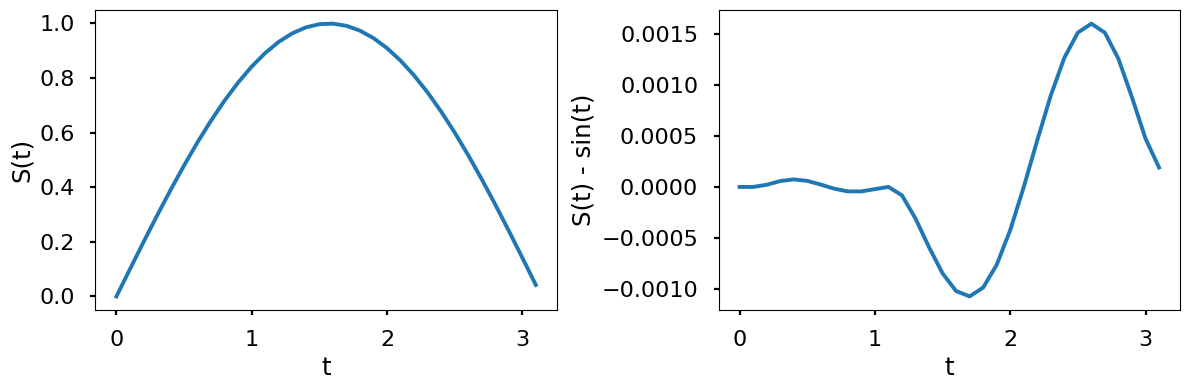

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()
#The chart on the left shows the numerical integration
#The chart on the right shows the error

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [-5.000e-01 -4.900e-01 ...  1.998e+01  1.999e+01]
        y: [[ 1.644e+00  1.650e+00 ... -5.682e+00 -4.412e+00]
            [ 2.504e+00  2.512e+00 ... -2.447e-01  8.372e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4484
     njev: 0
      nlu: 0


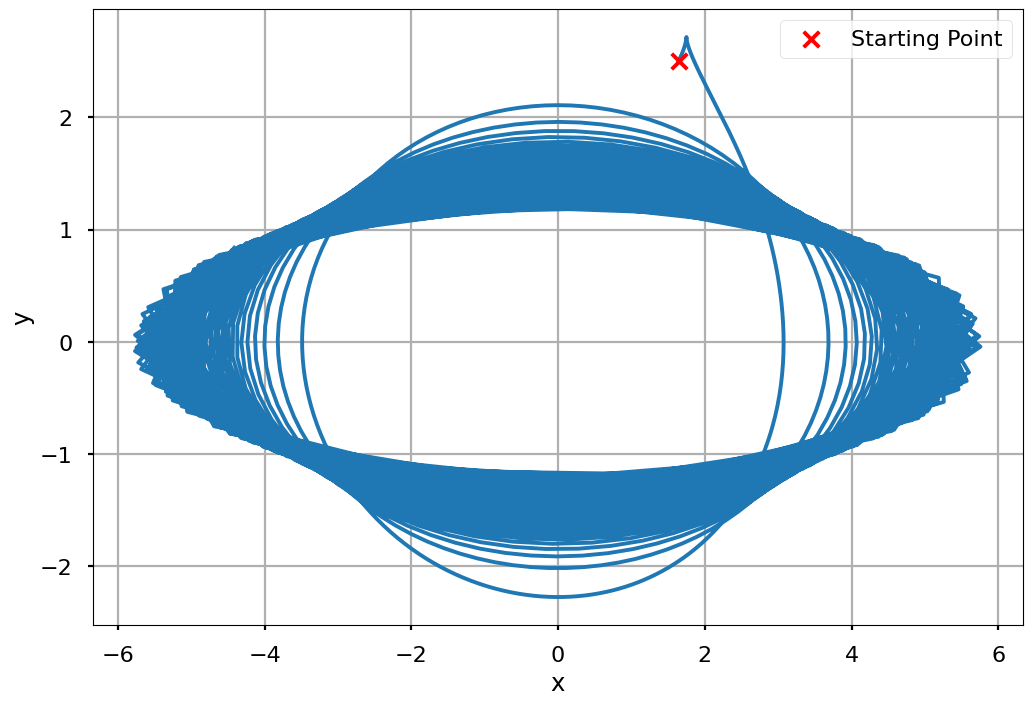

In [52]:
#The f function describes how the state have the system changes
#From these functions we can see that in y direction it will move by t^2 and -t in the x direciton
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(-0.5,20, 0.01)
sol = solve_ivp(F, [-1, 20], [1, 2], t_eval=t_eval)
print(sol)
plt.figure(figsize = (12, 8))
plt.scatter(sol.y.T[0, 0], sol.y.T[0, 1], color='red',marker='x', zorder=5, label='Starting Point')
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()